In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format #set some option so that if there are float it will cut them to 2 digits
import matplotlib.pyplot as plt
import seaborn as sns #also for plotting

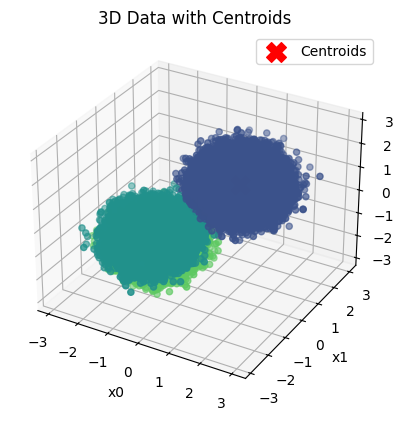

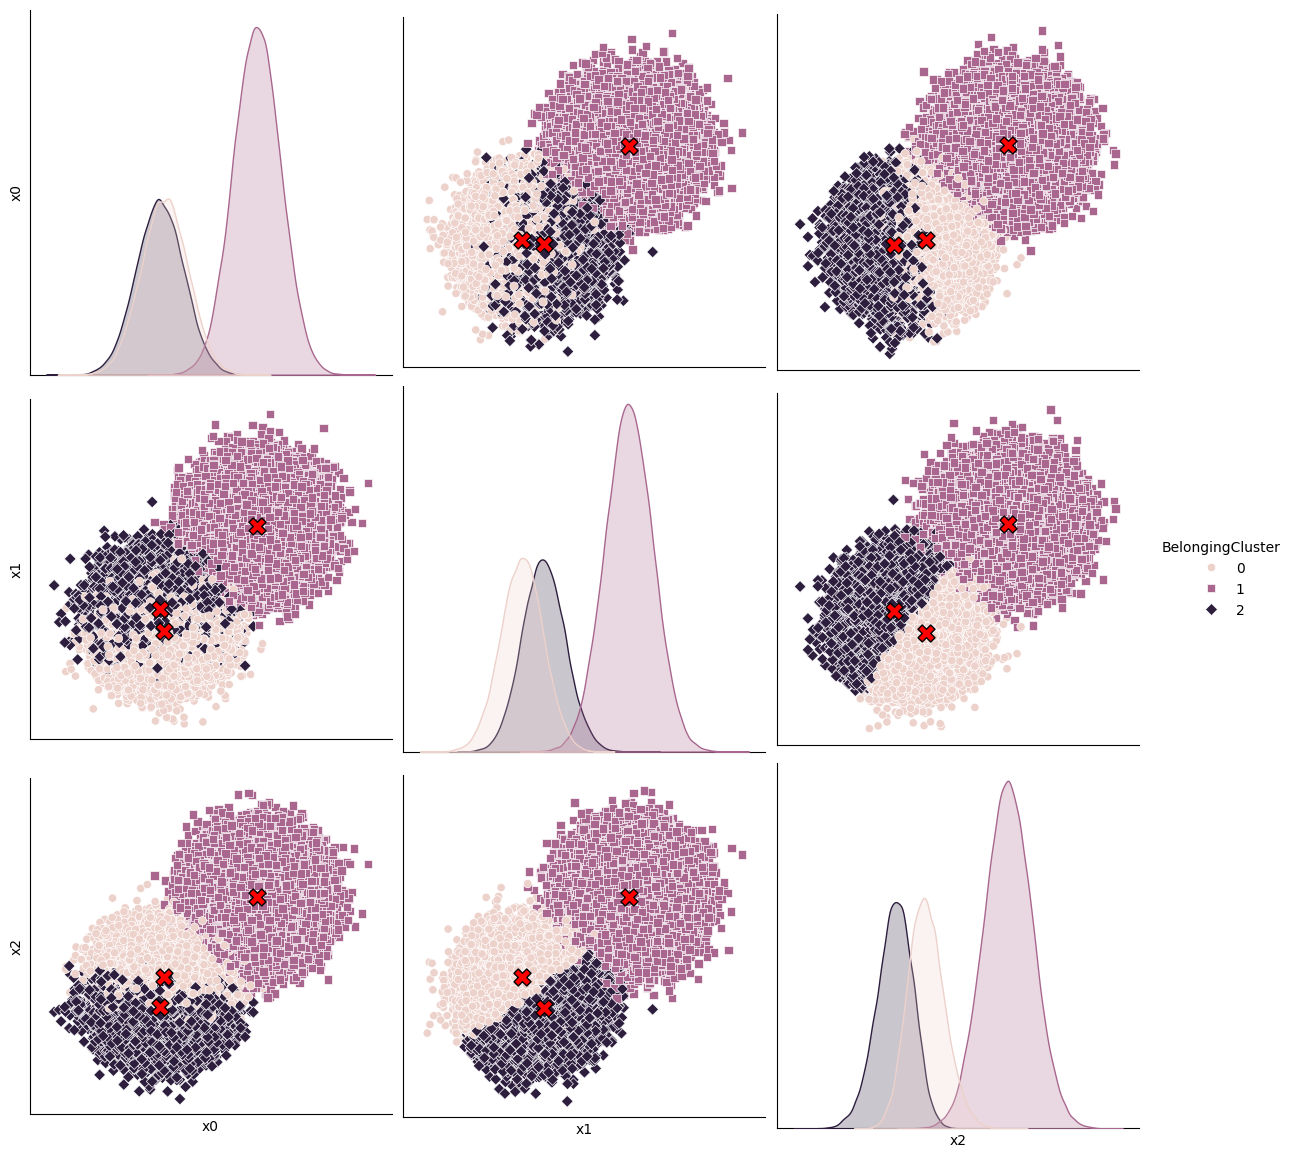

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data
string='output200000'
df = pd.read_csv('../src/'+string+'_cluster.csv')
df2 = pd.read_csv('../src/'+string+'_centroids.csv')

# Identify feature columns (everything except labels)
feature_cols = [c for c in df.columns if c != "BelongingCluster"]

# ---------- OPTIONAL 3D PLOT ----------
if len(feature_cols) >= 3:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    palette = sns.color_palette("viridis", df["BelongingCluster"].nunique())
    color_map = dict(zip(df["BelongingCluster"].unique(), palette))
    colors = df["BelongingCluster"].map(color_map)

    # Data points
    ax.scatter(
        df[feature_cols[0]],
        df[feature_cols[1]],
        df[feature_cols[2]],
        c=colors,
        s=20
    )

    # Centroids
    ax.scatter(
        df2[feature_cols[0]],
        df2[feature_cols[1]],
        df2[feature_cols[2]],
        c="red",
        s=200,
        marker="X",
        label="Centroids"
    )

    ax.set_xlabel(feature_cols[0])
    ax.set_ylabel(feature_cols[1])
    ax.set_zlabel(feature_cols[2])
    ax.set_title("3D Data with Centroids")
    ax.legend()
    plt.show()

# ---------- PAIRPLOT (ANY DIMENSION) ----------
g = sns.pairplot(
    df,
    vars=feature_cols,
    hue="BelongingCluster",
    height=4,
    markers=["o", "s", "D"]
)

# Overlay centroids
for i, x_var in enumerate(feature_cols):
    for j, y_var in enumerate(feature_cols):
        ax = g.axes[j, i]
        if i == j:
            ax.set_xticks([])
            ax.set_yticks([])
            # ax.set_xticklabels([])
            # ax.set_yticklabels([])
        else:
            ax.set_aspect('equal', adjustable='box')
            ax.scatter(
                df2[x_var],
                df2[y_var],
                c="red",
                s=150,
                marker="X",
                edgecolor="black"
            )

plt.show()